<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: September 20, 2020\
Author: Raka Ardhi

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [29]:
# Get your import statement here
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [2]:
# Load your dataset here (from Laptop)
df_nycsales = pd.read_csv('nyc-rolling-sales.csv')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
# Load your dataset here (from Gdrive)

url='https://drive.google.com/file/d/1kHBp4TbTpCdMZC_Snh33rJu6o3d4KNIl/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df_nycsales = pd.read_csv(dwn_url)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [4]:
# Write your syntax here
df_nycsales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [5]:
# Write your syntax here
df_nycsales.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [6]:
# Write your syntax here
df_nycsales.shape

(84548, 22)

According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [7]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function
df_nycsales.drop(['EASE-MENT', 'APARTMENT NUMBER'], axis=1, inplace=True)

Let's view Dtype of each features in dataframe using `.info()` function.

In [8]:
df_nycsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [9]:
#First, let's check which columns should be categorical
print('Column name')
for col in df_nycsales.columns:
    if df_nycsales[col].dtype=='object':
        print(col, df_nycsales[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [10]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df_nycsales[col] = pd.to_numeric(df_nycsales[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df_nycsales[col] = df_nycsales[col].astype('category')

df_nycsales['SALE DATE'] = pd.to_datetime(df_nycsales['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [13]:
missing = df_nycsales.isnull().sum()/len(df_nycsales)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df_nycsales.isnull().sum()[df_nycsales.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [14]:
print(df_nycsales[(df_nycsales['LAND SQUARE FEET'].isnull()) & (df_nycsales['GROSS SQUARE FEET'].notnull())].shape)
print(df_nycsales[(df_nycsales['LAND SQUARE FEET'].notnull()) & (df_nycsales['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [15]:
df_nycsales['LAND SQUARE FEET'] = df_nycsales['LAND SQUARE FEET'].mask((df_nycsales['LAND SQUARE FEET'].isnull()) & (df_nycsales['GROSS SQUARE FEET'].notnull()), df_nycsales['GROSS SQUARE FEET'])
df_nycsales['GROSS SQUARE FEET'] = df_nycsales['GROSS SQUARE FEET'].mask((df_nycsales['LAND SQUARE FEET'].notnull()) & (df_nycsales['GROSS SQUARE FEET'].isnull()), df_nycsales['LAND SQUARE FEET'])

In [16]:
#  Check for duplicates before
print(sum(df_nycsales.duplicated()))

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False
df_nycsales[df_nycsales.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.
df_nycsales.head()

0


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


The dataframe has 765 duplicated rows (exluding the original rows).

In [17]:
df_nycsales.drop_duplicates(inplace=True)

print(sum(df_nycsales.duplicated()))

0


## Exploratory data analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [19]:
df_nycsales[df_nycsales['COMMERCIAL UNITS']==0].describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,79429.000000,79429.000000,79429.000000,79429.000000,79429.000000,79429.000000,79429.0,79429.000000,5.323700e+04,5.323700e+04,79429.000000,6.592400e+04
mean,10353.817711,3.004797,4270.584018,395.803699,10721.690503,1.717257,0.0,1.750217,3.171489e+03,2.777222e+03,1780.395787,9.917650e+05
std,7140.985796,1.299437,3588.993150,671.927040,1320.121756,10.146362,0.0,10.142353,2.924843e+04,2.799603e+04,551.999810,3.322537e+06
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4256.000000,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.780000e+02,1920.000000,2.350000e+05
50%,8964.000000,3.000000,3335.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.300000e+03,1.600000e+03,1940.000000,5.250000e+05
75%,15980.000000,4.000000,6354.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.318000e+03,2.393000e+03,1967.000000,9.200000e+05
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Function below are graded function. (1 Points)

In [12]:
# Write your function below
df_nycsales[df_nycsales['RESIDENTIAL UNITS']==0].describe()

# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24783.000000,24783.000000,24783.00000,24783.000000,24783.000000,24783.0,24783.000000,24783.000000,9.650000e+03,8.480000e+03,24783.000000,2.097300e+04
mean,10749.226849,2.537869,3343.74999,285.173143,10318.242182,0.0,0.492515,0.598152,7.855944e+03,8.095211e+03,1674.012145,1.629889e+06
std,6535.559992,1.335198,3086.87143,570.307565,2136.962746,0.0,16.073953,16.073655,8.164736e+04,5.567277e+04,680.924383,1.964874e+07
min,16.000000,1.000000,1.00000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4951.000000,1.000000,1158.00000,12.000000,10023.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1921.000000,1.800000e+05
50%,10492.000000,3.000000,1944.00000,38.000000,11004.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1950.000000,3.900000e+05
75%,15690.500000,4.000000,5374.00000,136.000000,11354.000000,0.0,0.000000,0.000000,3.468000e+03,1.200000e+03,1962.000000,8.500000e+05
max,26739.000000,5.000000,16317.00000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,1.617206e+06,2017.000000,2.210000e+09


Write your findings below:

Total Borough

Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

In [21]:
# Write your syntax below
df_nycsales.sort_values('BOROUGH', ascending = False, inplace = True)
df_borough = df_nycsales['BOROUGH'].value_counts()
df_borough

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

From here, we can calculate the mean for each Borough. Use `.mean()` function to calculate mean.

Function below are graded function. (1 Points)

In [22]:
# Write your function below
df_borough.mean()

# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End

16909.6

From here, we can calculate the median for each Borough. Use `.median()` function to calculate median.

Function below are graded function. (1 Points)

In [23]:
# Write your function below
df_borough.median()

# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End


18306.0

From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

In [24]:
# Write your function below
df_borough.mode()

# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End


0     7049
1     8410
2    18306
3    24047
4    26736
dtype: int64

From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

In [25]:
# Write your function below
np.ptp(df_borough)

# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End


19687

From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [26]:
# Write your function below
df_borough.var()

# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End


79731295.3

From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

In [27]:
# Write your function below
df_borough.std(ddof=1)

# Graded-Funtion Begin (~1 Lines)

# Graded-Funtion End


8929.238226187046

Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

C:\Users\zaenal.abidin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribution'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Year Built')]

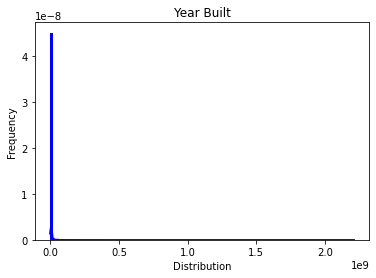

In [30]:
# Write your function below
ax = sns.distplot(df_nycsales['SALE PRICE'],
                  bins=100,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 15, 'alpha': 1})
ax.set(xlabel='Distribution', ylabel='Frequency', title='Year Built')
# Graded-Funtion Begin


# Graded-Funtion End

Now we can analyze Confidence Intervals below.

Function below are graded function. (1 Points)

In [32]:
# Write your function below
df_nycsales['SALE PRICE'].describe().astype(int)
# Graded-Funtion Begin
# CI components
z_score = 1.96 # 95% confidence level
mean_price = np.mean(df_nycsales['SALE PRICE'])
stdev_price = np.std(df_nycsales['SALE PRICE'])
size_price = np.size(df_nycsales['SALE PRICE'])

# Calculate boundary
lcb = mean_price - z_score * stdev_price / np.sqrt(size_price)
ucb = mean_price + z_score * stdev_price / np.sqrt(size_price)

# Output
print('Upper Boundary: ', ucb)
print('Lower Boundary: ', lcb)


# Graded-Funtion End

Upper Boundary:  1353335.247556244
Lower Boundary:  1199577.747971497


Make your Hypothesis Testing below

Function below are graded function. (1 Points)

In [ ]:
# Write your function below

# Graded-Funtion Begin

# Graded-Funtion End


Write your final conclusion below.

Your conclusion below are graded. (1 Points)